In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# The purpose of this notebook is to add as many features as we can imagine and see which ones are the most relevant

In [140]:
train = pd.read_csv('data/train_clean.csv')

## Transform attributes in numeric values

In [141]:
train.columns

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')

### Drop CUST_COD

We won't use it, at the moment

In [142]:
train = train.drop(['CUST_COD'], axis=1)

## Transform SEX

In [143]:
train['SEX_MISSING'] = train['SEX'].isnull()*1      # Add a column to say if sex was missing or not

In [144]:
train.loc[train['SEX'].isnull(), 'SEX'] = 'F' # Predict sex with majority class

In [145]:
train['SEX'] = train['SEX'].apply(lambda x : 0 if x == 'M' else 1)   # Convert to M -> 0, F -> 1

## Transform EDUCATION

In [146]:
train['EDUCATION_MISSING'] = train['EDUCATION'].isnull() * 1 # Add a column to say if education was missing or not
train['EDUCATION'] = train['EDUCATION'].fillna('other')    # Predict missing values as other

In [147]:
train = pd.get_dummies(train, columns=['EDUCATION'])   # Get one hot vector for education

## Trasform MARRIAGE

In [148]:
train['MARRIAGE_MISSING'] = train['MARRIAGE'].isnull() * 1 # Add a column to say if education was missing or not
train['MARRIAGE'] = train['MARRIAGE'].fillna('other')    # Predict missing values as other
train = pd.get_dummies(train, columns=['MARRIAGE'])   # Get one hot vector for education

## Transform BIRTH_DATE

In [149]:
train['AGE_MISSING'] = train['BIRTH_DATE'].isnull() * 1

In [150]:
import datetime

birthdates = train['BIRTH_DATE']

def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

birthdates = birthdates.apply(get_age)

In [151]:
birthdates.describe()

count    26182.000000
mean        36.488160
std          9.201312
min         22.000000
25%         29.000000
50%         35.000000
75%         42.000000
max         76.000000
Name: BIRTH_DATE, dtype: float64

In [152]:
# Fill NA with mean value
birthdates = birthdates.fillna(36)

In [153]:
train['AGE'] = birthdates
train = train.drop(['BIRTH_DATE'], axis=1)

## Transform all columns in float

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 33 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null int64
PAY_DEC                      26884 non-null int64
PAY_NOV                      26884 non-null int64
PAY_OCT                      26884 non-null int64
PAY_SEP                      26884 non-null int64
PAY_AUG                      26884 non-null int64
PAY_JUL                      26884 non-null int64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT_SEP          

In [155]:
train = train.astype('float64')

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 33 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null float64
PAY_DEC                      26884 non-null float64
PAY_NOV                      26884 non-null float64
PAY_OCT                      26884 non-null float64
PAY_SEP                      26884 non-null float64
PAY_AUG                      26884 non-null float64
PAY_JUL                      26884 non-null float64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT

# Use decision tree to evaluate variable importance

In [157]:
model = DecisionTreeClassifier()

X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

model = model.fit(X, y)
predictions = model.predict(X)

In [158]:
print("Train accuracy decision tree: {0}".format(accuracy_score(y, predictions)))

Train accuracy decision tree: 0.9995908346972177


<Container object of 50 artists>

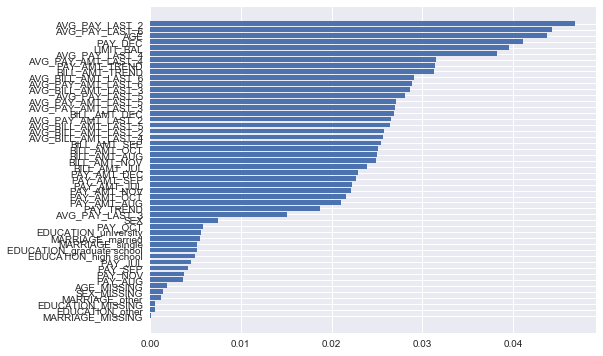

In [234]:
feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

<Container object of 50 artists>

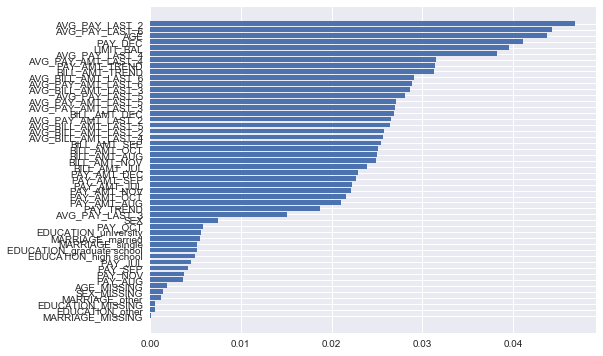

In [233]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model = model.fit(X, y)

predictions = model.predict(X)

feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

In [161]:
print("Train accuracy of random forest: {0}".format(accuracy_score(y, predictions)))

Train accuracy of random forest: 0.9789093884838566


# Insert additional features

## Mean value and trend for PAY_X

In [248]:
pay_cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']

def avg_payments(columns):
    def ret(x):
        retval = 0
        for c in columns:
            retval += x[c]
        return retval / len(columns)
    return ret

for i in range(-2, -7, -1):
    train['AVG_PAY_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(pay_cols[i:]), axis=1)

In [249]:
def get_trend(y):
    N = len(y)
    x = range(N)
    B = (sum(x[i] * y[i] for i in range(N)) - 1./N*sum(x)*sum(y)) / (sum(x[i]**2 for i in range(N)) - 1./N*sum(x)**2)
    return B
    
def get_col_trend(cols):
    def get_cols(x):
        return get_trend([v for v in x.loc[cols]])
    return get_cols

train['PAY_TREND'] = train.apply(get_col_trend(pay_cols), axis=1)

## Mean value and trend for BILL_AMT_X

In [250]:
bill_amt_cols = ['BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP', 'BILL_AMT_OCT', 'BILL_AMT_NOV', 'BILL_AMT_DEC']

for i in range(-2, -7, -1):
    train['AVG_BILL_AMT_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(bill_amt_cols[i:]), axis=1)

In [251]:
train['BILL_AMT_TREND'] = train.apply(get_col_trend(bill_amt_cols), axis=1)

## Mean value and trend for PAY_AMT_X

In [252]:
pay_amt_cols = ['PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP', 'PAY_AMT_OCT', 'PAY_AMT_NOV', 'PAY_AMT_DEC']

for i in range(-2, -7, -1):
    train['AVG_PAY_AMT_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(pay_amt_cols[i:]), axis=1)
train['PAY_AMT_TREND'] = train.apply(get_col_trend(pay_amt_cols), axis=1)

## Delta AMT

In [254]:
for i in range(6):
    train['DELTA_{0}'.format(i)] = train.apply(lambda x : x.loc[bill_amt_cols[i]] - x.loc[pay_amt_cols[i]], axis=1)

# Run feature importance again

In [277]:
model = DecisionTreeClassifier()

X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

model = model.fit(X, y)
predictions = model.predict(X)

In [275]:
print("Train accuracy decision tree: {0}".format(accuracy_score(y, predictions)))

Train accuracy decision tree: 0.9995908346972177


<Container object of 56 artists>

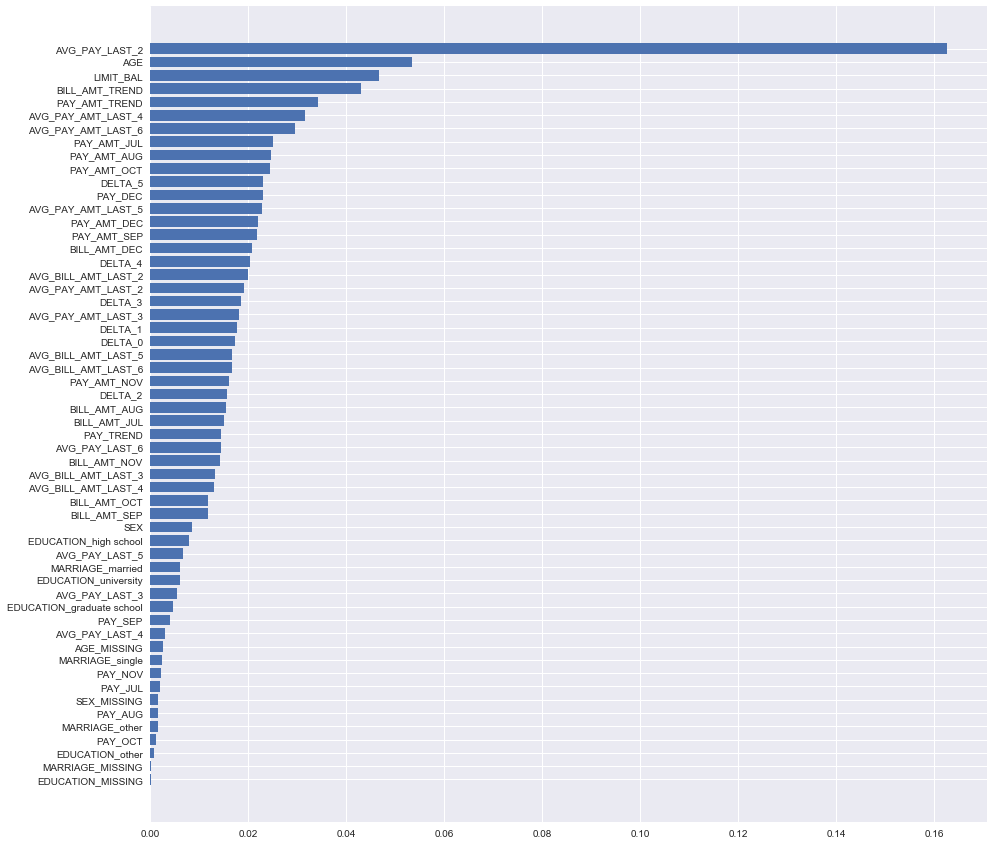

In [276]:
feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(15, 15))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

In [261]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model = model.fit(X, y)

predictions = model.predict(X)

<Container object of 56 artists>

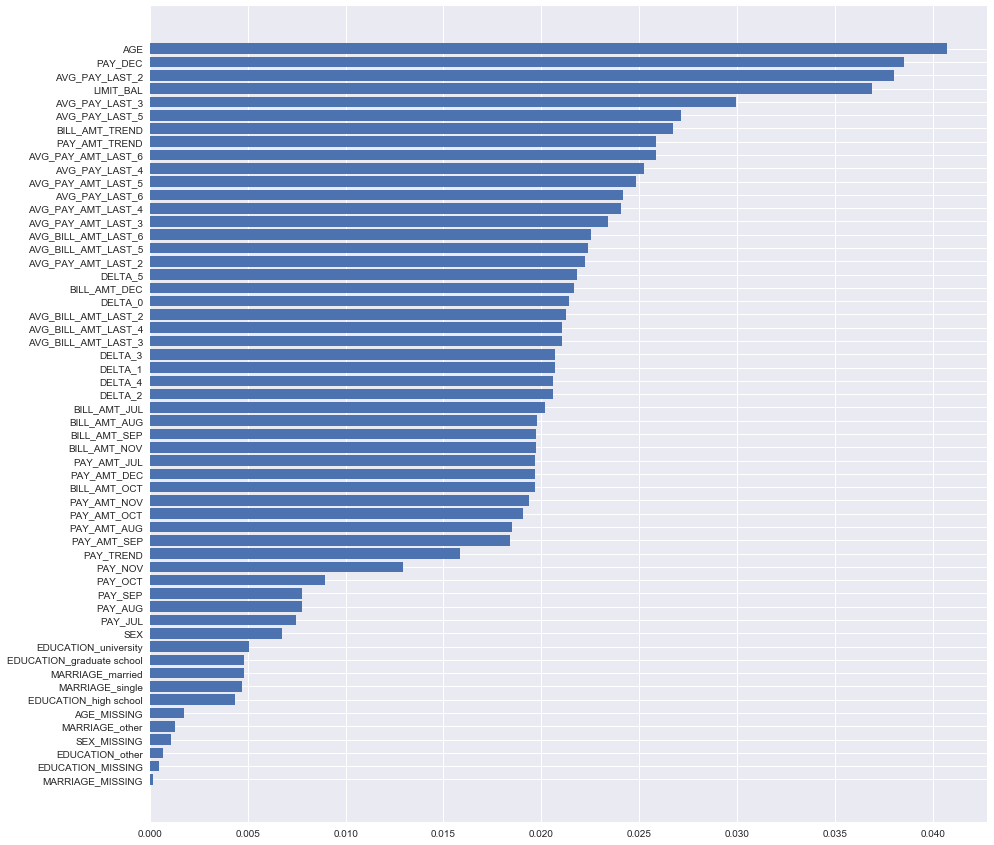

In [262]:
feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(15, 15))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

In [263]:
print("Train accuracy of random forest: {0}".format(accuracy_score(y, predictions)))

Train accuracy of random forest: 0.9995908346972177
